In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-01 06:45:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-01 06:45:42 (81.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# Intel Image Classification

In [ ]:
!unzip '/content/drive/MyDrive/Dataset/intel_image_classification/Intel_image_classification.zip' -d 'intel'

Streaming output truncated to the last 5000 lines.
  inflating: intel/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel/seg_train/seg_train/mountain/767.jpg  
  inflating: intel/seg_train/seg_train/mountain/7672.jpg  
  inflating: intel/seg_train/seg_train/mountain/7679.jpg  
  infl

In [ ]:
import os

# Walk through pizza_steak directory and list number pf files
for dirpath, dirnames, filenames in os.walk("intel/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'intel/'.
There are 1 directories and 0 images in 'intel/seg_test'.
There are 6 directories and 0 images in 'intel/seg_test/seg_test'.
There are 0 directories and 474 images in 'intel/seg_test/seg_test/forest'.
There are 0 directories and 501 images in 'intel/seg_test/seg_test/street'.
There are 0 directories and 510 images in 'intel/seg_test/seg_test/sea'.
There are 0 directories and 553 images in 'intel/seg_test/seg_test/glacier'.
There are 0 directories and 437 images in 'intel/seg_test/seg_test/buildings'.
There are 0 directories and 525 images in 'intel/seg_test/seg_test/mountain'.
There are 1 directories and 0 images in 'intel/seg_train'.
There are 6 directories and 0 images in 'intel/seg_train/seg_train'.
There are 0 directories and 2271 images in 'intel/seg_train/seg_train/forest'.
There are 0 directories and 2382 images in 'intel/seg_train/seg_train/street'.
There are 0 directories and 2274 images in 'intel/seg_train/seg_train/sea'.
Ther

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("intel/seg_train/seg_train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = list(class_names)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


['6567.jpg']
Image shape: (150, 150, 3)


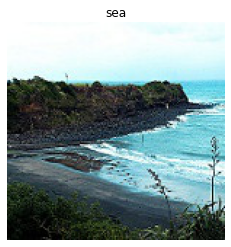

In [ ]:
img = view_random_image(target_dir="intel/seg_train/seg_train/",
                        target_class='sea')

In [ ]:
import tensorflow as tf
tf.reduce_max(img), tf.reduce_min(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

## Preprocess

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory('intel/seg_train/seg_train/',
                                                         image_size = (224,224),
                                                         shuffle=True,
                                                         label_mode='categorical',
                                                         batch_size=32)
val_data = tf.keras.utils.image_dataset_from_directory('intel/seg_test/seg_test/',
                                                         image_size = (224,224),
                                                         shuffle=False,
                                                         label_mode='categorical',
                                                         batch_size=32)

train_data = train_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

train_data, val_data

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>)

In [ ]:
# Create augnmentation layer
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([preprocessing.RandomFlip('horizontal'),
                                        preprocessing.RandomRotation(0.2),
                                        preprocessing.RandomZoom(0.2),
                                        preprocessing.RandomHeight(0.2),
                                        preprocessing.RandomWidth(0.2),
                                        preprocessing.Rescaling(1/255.)], name = 'data_augmentation')

## Modelling

## Conv2D

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(224,224,3), name='input')
x = layers.Rescaling(1./255)(input)
# x = data_augmentation(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(10, 3, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalMaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(len(class_names), activation = 'softmax')(x)
model_intel = tf.keras.Model(input, output, name = 'model_intel')

model_intel.compile(loss='categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['acc'])

history_intel = model_intel.fit(train_data,
                                epochs=2,
                                validation_data = val_data,
                                callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoint'+model_intel.name,
                                                                                monitor = 'val_loss',
                                                                                save_best_only = True,
                                                                                save_weights_only = True)])

In [ ]:
best_model_intel = tf.keras.models.clone_model(model_intel)
best_model_intel.load_weights('model_checkpoint'+model_intel.name)

best_model_intel.compile(loss='categorical_crossentropy',
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['acc'])

best_model_intel.evaluate(val_data)

### Evaluate

In [ ]:
# get val_data
val_images, val_labels = tuple(zip(*val_data.unbatch()))
val_labels = np.array(val_labels)
val_images = np.array(val_images)
val_labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
pred_prob = best_model_intel.predict(val_images)
pred = tf.argmax(pred_prob, axis=1)
labels = tf.argmax(val_labels,axis=1)
pred[:10], labels[:10]

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 4, 3, 5, 5, 0, 5])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = labels,
                            y_pred = pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       437
           1       0.87      0.93      0.90       474
           2       0.55      0.90      0.68       553
           3       0.78      0.62      0.69       525
           4       0.81      0.54      0.65       510
           5       0.75      0.50      0.60       501

    accuracy                           0.69      3000
   macro avg       0.73      0.69      0.69      3000
weighted avg       0.72      0.69      0.69      3000



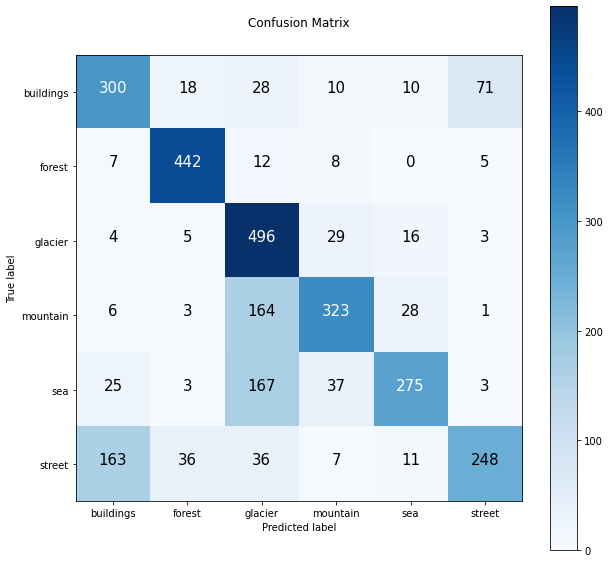

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true = labels,
                      y_pred = pred,
                      classes = class_names)

## Transfer Learning

### Efficientnet_v2

In [ ]:
import tensorflow_hub as hub
efficientnet = hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2", 
                              trainable=True, name = 'efficientnet_v2')

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(224,224,3), name = 'input')
x = efficientnet(input)
# x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(len(class_names), activation = 'softmax')(x)
efficientnet_model = tf.keras.Model(input, output, name='efficientnet_model')

efficientnet_model.compile(loss='categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['acc'])

In [ ]:
history_efficientnet = efficientnet_model.fit(train_data,
                                epochs=2,
                                validation_data = val_data,
                                callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoint'+efficientnet_model.name,
                                                                                monitor = 'val_loss',
                                                                                save_best_only = True,
                                                                                save_weights_only = True)])

Epoch 1/2
439/439 [==============================] - 239s 480ms/step - loss: 0.6301 - acc: 0.8367 - val_loss: 0.2454 - val_acc: 0.9197
Epoch 2/2
439/439 [==============================] - 204s 465ms/step - loss: 0.2851 - acc: 0.9087 - val_loss: 0.2499 - val_acc: 0.9243


#### Evaluate

In [ ]:
# get val_data
val_images, val_labels = tuple(zip(*val_data.unbatch()))
val_labels = np.array(val_labels)
val_images = np.array(val_images)
val_labels[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
pred_prob = efficientnet_model.predict(val_images)
pred = tf.argmax(pred_prob, axis=1)
labels = tf.argmax(val_labels,axis=1)
pred[:10], labels[:10]

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = labels,
                            y_pred = pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       437
           1       0.99      0.99      0.99       474
           2       0.85      0.92      0.88       553
           3       0.93      0.84      0.88       525
           4       0.94      0.97      0.95       510
           5       0.96      0.89      0.92       501

    accuracy                           0.92      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.92      0.92      3000



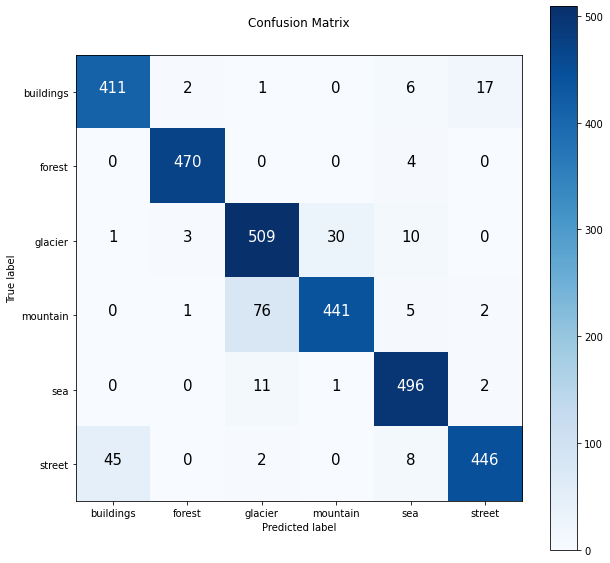

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true = labels,
                      y_pred = pred,
                      classes = class_names)

### EfficientnetB0

In [ ]:
from tensorflow.keras import layers

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input = tf.keras.Input(shape=(224,224,3), name='Input_layer')
x = base_model(input, training=False)
x = layers.GlobalAveragePooling2D(name='Global_average_pooling_2D')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(class_names), activation='softmax')(x)
effb0_model = tf.keras.Model(input, output, name='effb0_model')

effb0_model.compile(loss='categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['acc'])

In [ ]:
history_effb0 = effb0_model.fit(train_data,
                                epochs=2,
                                validation_data = val_data,
                                callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoint'+effb0_model.name,
                                                                                monitor = 'val_loss',
                                                                                save_best_only = True,
                                                                                save_weights_only = True)])

Epoch 1/2
439/439 [==============================] - 27s 52ms/step - loss: 0.2649 - acc: 0.9020 - val_loss: 0.2105 - val_acc: 0.9207
Epoch 2/2
439/439 [==============================] - 22s 49ms/step - loss: 0.1710 - acc: 0.9364 - val_loss: 0.2044 - val_acc: 0.9257


#### Evaluate

In [ ]:
# get val_data
val_images, val_labels = tuple(zip(*val_data.unbatch()))
val_labels = np.array(val_labels)
val_images = np.array(val_images)
val_labels[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
pred_prob = effb0_model.predict(val_images)
pred = tf.argmax(pred_prob, axis=1)
labels = tf.argmax(val_labels,axis=1)
pred[:10], labels[:10]

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 5, 0, 0])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = labels,
                            y_pred = pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       437
           1       0.99      1.00      0.99       474
           2       0.86      0.86      0.86       553
           3       0.89      0.85      0.87       525
           4       0.94      0.98      0.96       510
           5       0.95      0.94      0.95       501

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



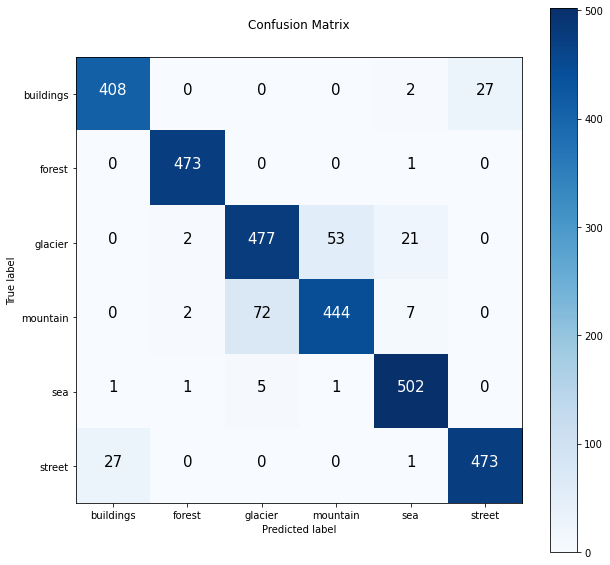

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true = labels,
                      y_pred = pred,
                      classes = class_names)